In [1]:
#Checking the GPU from the Google colab 
!nvidia-smi

Sat Aug  6 06:24:43 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [4]:
#connecting the Google Drive 
#unzip the Dataset from the Google Drive 
!unzip "/content/drive/MyDrive/Ai/pox.zip"

Archive:  /content/drive/MyDrive/Ai/pox.zip
   creating: pox/
   creating: pox/test/
   creating: pox/test/Chickenpox/
  inflating: pox/test/Chickenpox/chickenpox1.png  
  inflating: pox/test/Chickenpox/chickenpox10.png  
  inflating: pox/test/Chickenpox/chickenpox100.png  
  inflating: pox/test/Chickenpox/chickenpox101.png  
  inflating: pox/test/Chickenpox/chickenpox102.png  
  inflating: pox/test/Chickenpox/chickenpox103.png  
  inflating: pox/test/Chickenpox/chickenpox104.png  
  inflating: pox/test/Chickenpox/chickenpox105.png  
  inflating: pox/test/Chickenpox/chickenpox106.png  
  inflating: pox/test/Chickenpox/chickenpox107.png  
  inflating: pox/test/Chickenpox/chickenpox11.png  
  inflating: pox/test/Chickenpox/chickenpox12.png  
  inflating: pox/test/Chickenpox/chickenpox13.png  
  inflating: pox/test/Chickenpox/chickenpox14.png  
  inflating: pox/test/Chickenpox/chickenpox15.png  
  inflating: pox/test/Chickenpox/chickenpox16.png  
  inflating: pox/test/Chickenpox/chickenpo

In [5]:
IMAGE_SIZE = [224, 224]

train_path = '/content/pox/train'
valid_path = '/content/pox/test'

In [11]:
model = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


In [12]:
for layer in model.layers:
    layer.trainable = False

In [13]:
  # useful for getting number of output classes
folders = glob('/content/pox/train/*')

In [14]:
# our layers - you can add more if you want
x = Flatten()(model.output)

In [16]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=model.input, outputs=prediction)

In [17]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [18]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [19]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [20]:
training_set = train_datagen.flow_from_directory('/content/pox/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 4500 images belonging to 3 classes.


In [21]:
test_set = test_datagen.flow_from_directory('/content/pox/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 477 images belonging to 3 classes.


In [23]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=3,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/3
141/141 [==============================] - 68s 485ms/step - loss: 1.1678 - accuracy: 0.4996 - val_loss: 1.9687 - val_accuracy: 0.3333
Epoch 2/3
141/141 [==============================] - 70s 499ms/step - loss: 1.1517 - accuracy: 0.5340 - val_loss: 0.9172 - val_accuracy: 0.5975
Epoch 3/3
141/141 [==============================] - 70s 493ms/step - loss: 0.9152 - accuracy: 0.5862 - val_loss: 1.0376 - val_accuracy: 0.5409


In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Accuracy Curves')

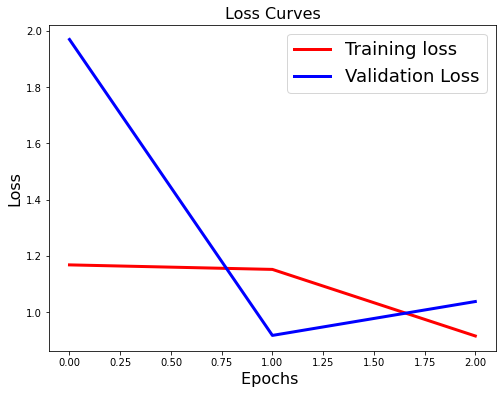

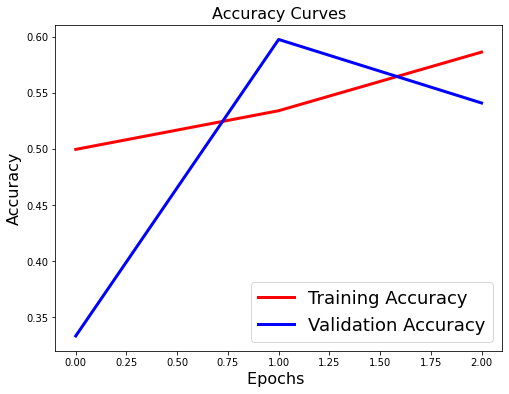

In [25]:
#Plot the Graph

# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(r.history['loss'],'r',linewidth=3.0)
plt.plot(r.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
  
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(r.history['accuracy'],'r',linewidth=3.0)
plt.plot(r.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.


Confusion Matrix
Normalized confusion matrix
Classification Report
              precision    recall  f1-score   support

 Chicken Pox       0.21      0.29      0.24       107
     Measles       0.22      0.49      0.31        91
   MonkeyPox       0.61      0.28      0.38       279

    accuracy                           0.32       477
   macro avg       0.35      0.35      0.31       477
weighted avg       0.45      0.32      0.34       477



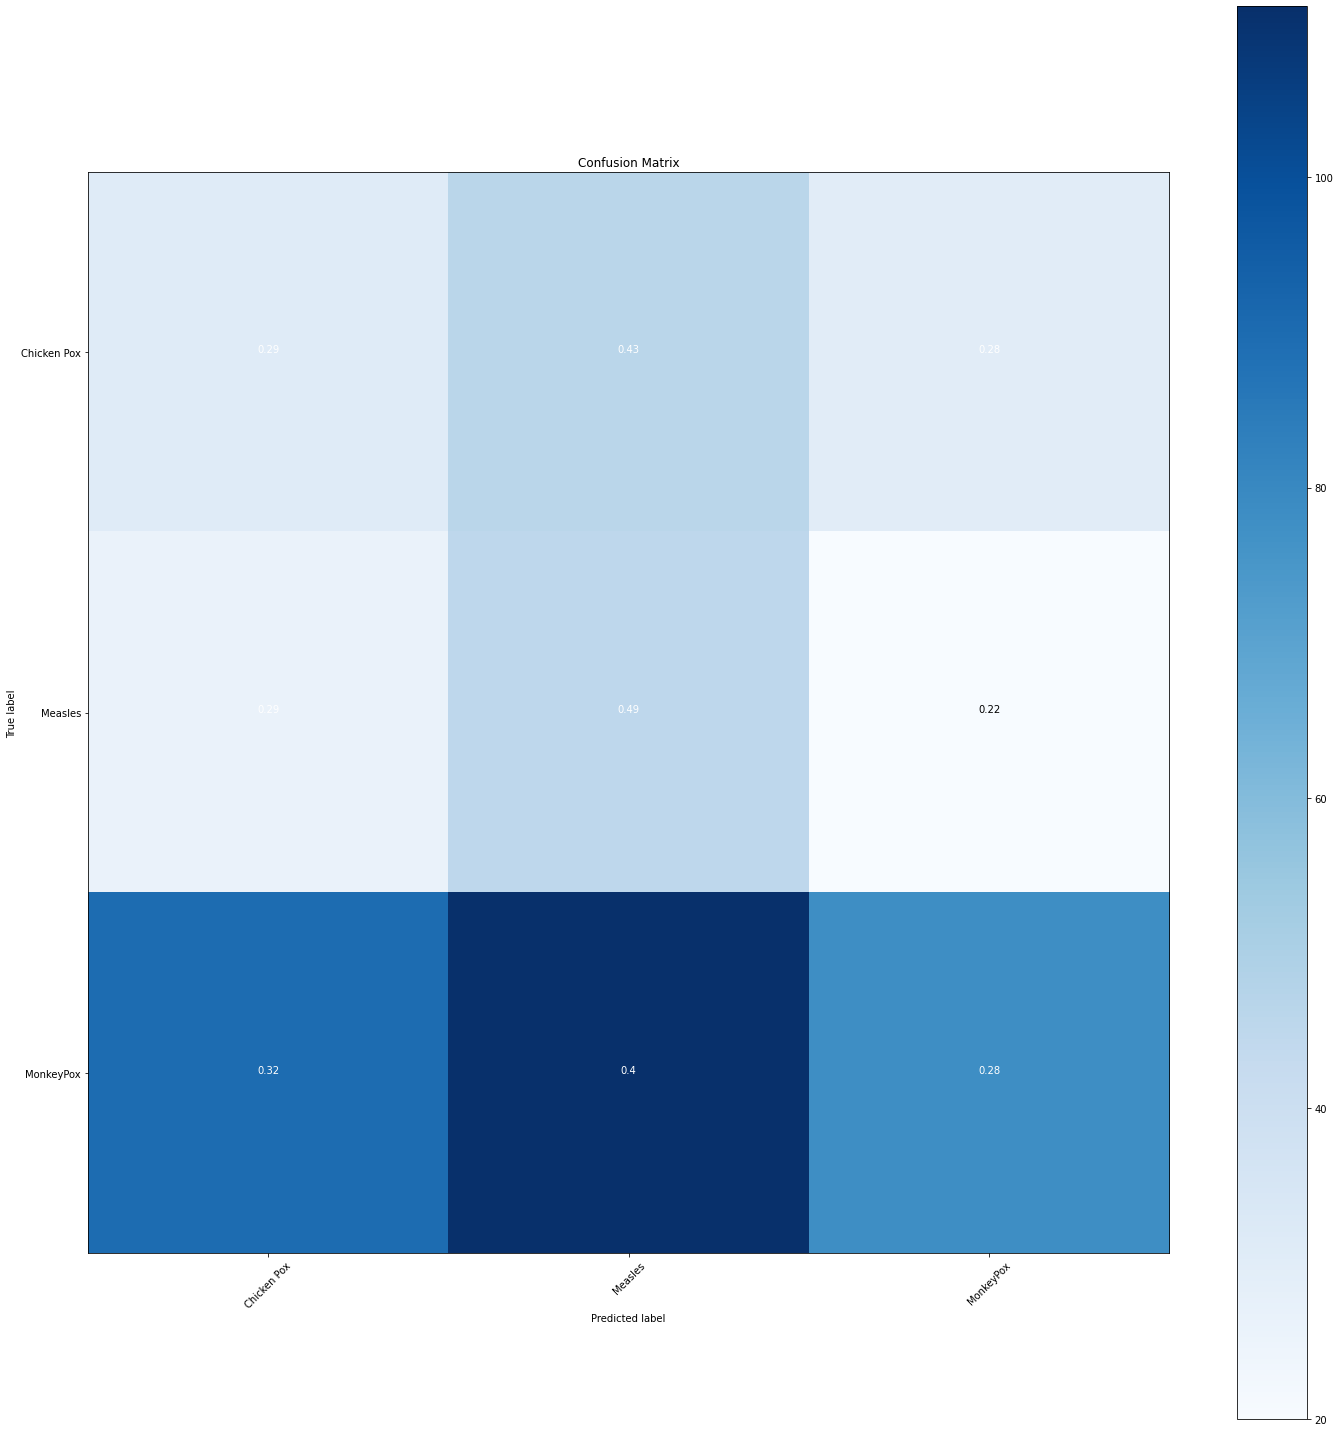

In [28]:
#Plot the confusion matrix. Set Normalize = True/False

def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(20,20))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#Print the Target names
from sklearn.metrics import classification_report, confusion_matrix
import itertools 
#shuffle=False

target_names = []
for key in training_set.class_indices:
    target_names.append(key)

# print(target_names)

#Confution Matrix 

Y_pred = model.predict_generator(test_set)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(test_set.classes, y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')

#Print Classification Report
print('Classification Report')
print(classification_report(test_set.classes, y_pred, target_names=target_names))